### 📊 *Business Understanding*

#### A) *Overview*

Small businesses in Ghana play a crucial role in driving the country’s economic growth, contributing significantly to GDP and employment. However, many of these businesses operate under financial constraints, lack access to data-driven decision-making, and face challenges in profitability and sustainability. This project analyzes a dataset simulating operational and financial records of small businesses across various regions in Ghana to uncover performance patterns and identify key factors influencing success.

---

#### B) *Objectives*

1. Understand the operational and financial structure of small businesses in Ghana.
2. Identify and address data quality issues such as missing values and inconsistent formats.
3. Engineer meaningful features to enhance model performance and insight generation.
4. Apply data preprocessing techniques like scaling, encoding, and normalization.
5. Generate actionable insights through visual analytics.
6. Answer key business questions using machine learning and AI techniques.

---

#### C) *Problem Statement*

Small businesses in Ghana often lack the analytical tools to understand what drives or hinders their performance. By exploring and modeling this data, we aim to identify which factors (e.g., region, business type, education of owners, advertising spend) most significantly influence profitability, customer satisfaction, and operational efficiency.

---

#### D) *Stakeholders*

* *Small Business Owners:* Want to understand what contributes to profitability and growth.
* *Policy Makers and Government Agencies:* Need insights for creating policies and support systems for SMEs.
* *Financial Institutions and NGOs:* Use data to assess risk and fund businesses effectively.
* *Data Analysts/Data Scientists:* Responsible for analyzing, cleaning, modeling, and interpreting the data.

---

#### E) *Features (Key Parts of the Data)*

* *Numerical Features:* revenue, expenses, advertising, employee_count, customer_satisfaction.
* *Categorical Features:* region, business_type, owner_education, ownership_type.
* *Derived Features (to be created):* profit (revenue - expenses), profit_margin, profit_per_employee.


In [ ]:
# This is cell takes all imports

%pip install numpy

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-no

In [19]:
# Load data
df = pd.read_csv('./../Data/small_business_ghana.csv')  

df.head(5)



,business_type,region,revenue,expenses,profit_margin,years_in_operation,owner_education,employee_count,advertising,customer_satisfaction,credit_access,sector_growth
0,Services,Greater Accra,42584.82,21758.31,21.441057,19,Secondary,74,503.67,5,Yes,16.34
1,Manufacturing,Volta,NaN,4188.66,26.951441,4,No Formal Education,98,3434.45,1,Yes,16.04
2,Retail,Western,35736.64,24012.47,43.286788,1,Tertiary,57,3307.10,3,Yes,14.18
3,Services,Volta,28088.18,19916.94,8.954943,8,Secondary,90,1438.97,5,No,13.70
4,Services,Western,15529.00,36193.86,41.263920,23,Secondary,41,4759.23,5,No,-0.86


In [ ]:
#Check for missing values
df.info()

In [ ]:
#Check for summary statistics
df.describe()

In [39]:
#Find all the colunms in the dataset
df.columns

Index(['business_type', 'region', 'revenue', 'expenses', 'profit_margin',
       'years_in_operation', 'owner_education', 'employee_count',
       'advertising', 'customer_satisfaction', 'credit_access',
       'sector_growth'],
      dtype='object')

In [ ]:
#Calculating for the unique business categories
business_category = df['business_type'].unique()
print(business_category)

#Calculating for the unique regions
region = df['region'].unique()
print(region)

#Calculating for the number of each business type in each region
business_per_region = df.groupby(['region', 'business_type']).size().reset_index(name='counts')
print(business_per_region)

#Calculating for the total number of businesses in each region
business_region = df['region'].value_counts()
print(business_region)



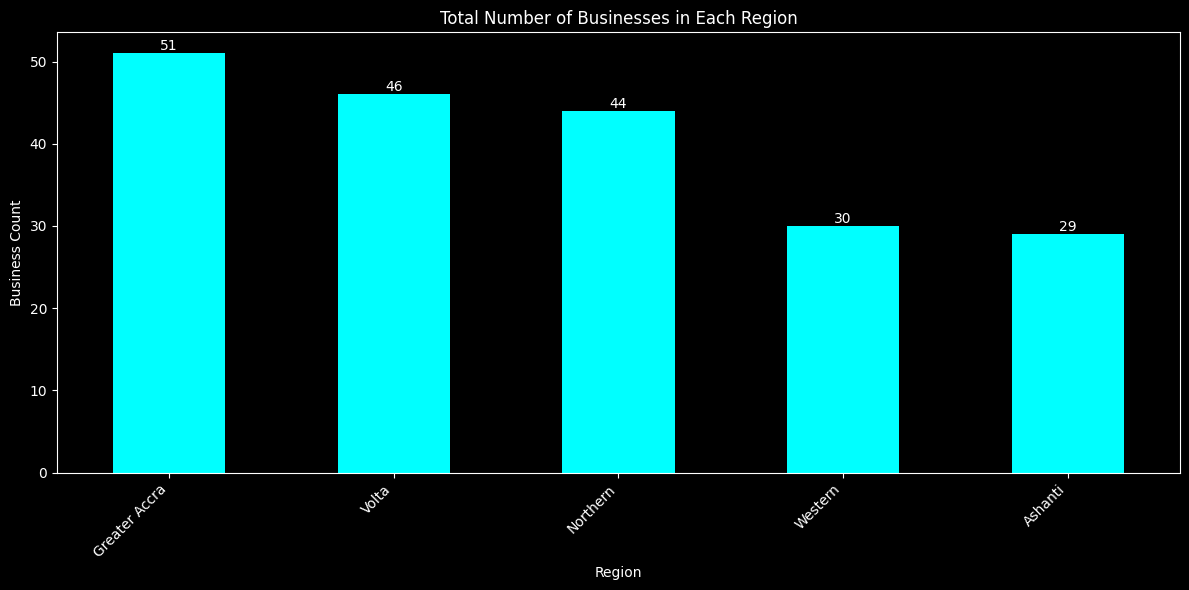

In [28]:
#Plot the total number of businesses in each region

plt.style.use('dark_background')
plt.figure(figsize=(12,6))
ax = business_region.plot(kind='bar', legend=False, color='cyan')
plt.title('Total Number of Businesses in Each Region')
plt.xlabel('Region')
plt.ylabel('Business Count')
plt.xticks(rotation=45, ha='right', color='white') # Rotate x-axis labels for readability
plt.yticks(color='white')

# Add the data labels (counts) on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='white', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout() # Adjust layout to prevent labels from overlappin
plt.show()
                                                                        


In [33]:
#calcutaing the total revenue 
total_revenue = df['revenue'].sum()
print(f'Total revenue:GHs{total_revenue}')

#calculating the total revenue by region
total_revenue_region = df.groupby('region')['revenue'].sum().reset_index()
print(total_revenue_region)

#calculating the total revenue by business type 
total_revenue_business = df.groupby('business_type')['revenue'].sum().reset_index()
print(total_revenue_business)

Total revenue:GHs4583542.66
          region     revenue
0        Ashanti   556664.34
1  Greater Accra  1116555.84
2       Northern  1167292.56
3          Volta  1093309.63
4        Western   649720.29
   business_type     revenue
0    Agriculture  1035912.76
1  Manufacturing  1174880.52
2         Retail  1173113.84
3       Services  1199635.54


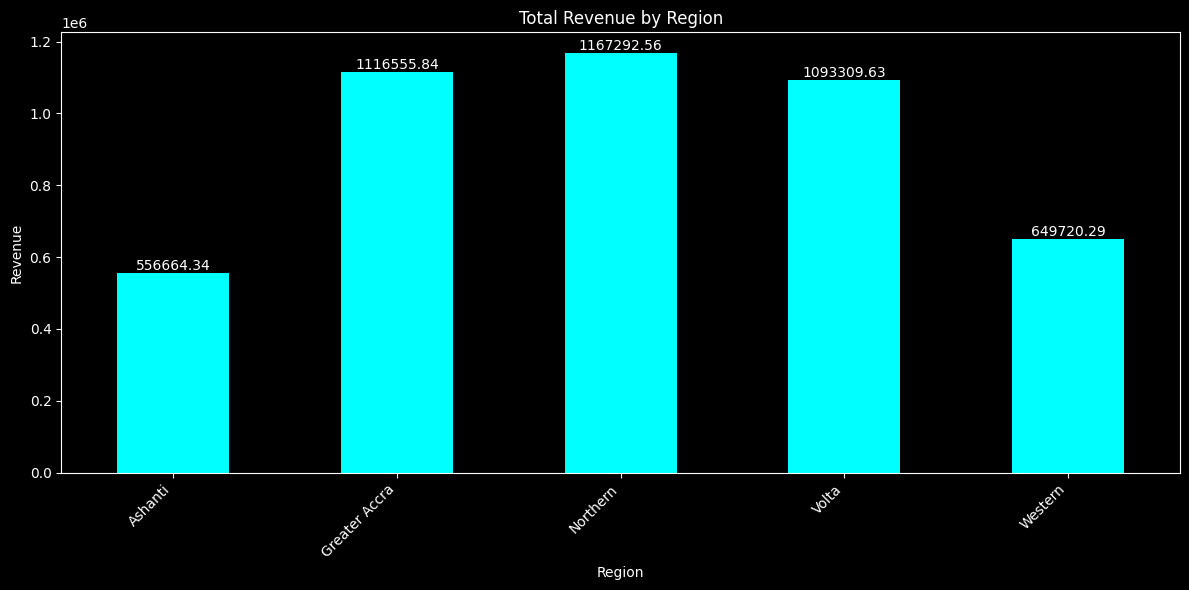

In [36]:
#Plot the total revenue by region
tot_rev_region = df.groupby('region')['revenue'].sum()
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
ax = tot_rev_region.plot(kind='bar', legend=False, color='cyan')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right', color='white') 
plt.yticks(color='white') 

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='white', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout() # Adjust layout to prevent labels from overlappin
plt.show()



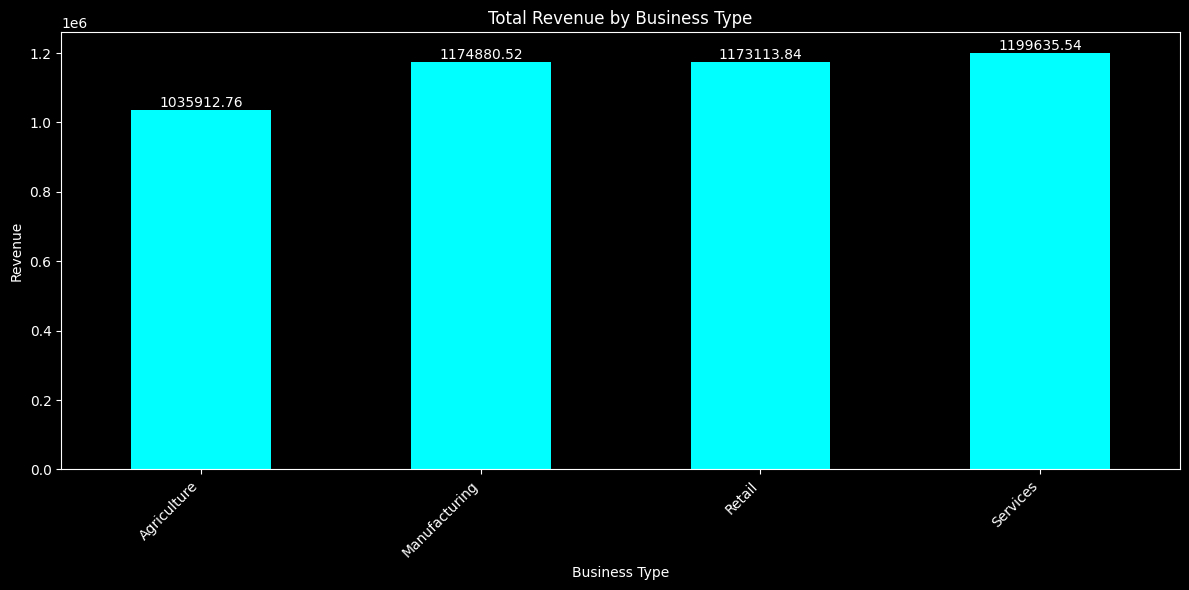

In [37]:
#Plot the total revenue by business type 
tot_rev_business = df.groupby('business_type')['revenue'].sum()
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
ax = tot_rev_business.plot(kind='bar', legend=False, color='cyan')
plt.title('Total Revenue by Business Type')
plt.xlabel('Business Type')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')

for p in ax.patches:        
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='white', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()

In [42]:
#Calculating the  total sector growth rate by business type 
total_growth_rate = df.groupby('business_type')['sector_growth'].sum()
print(total_growth_rate)

business_type
Agriculture      152.83
Manufacturing    327.80
Retail           138.61
Services         367.12
Name: sector_growth, dtype: float64


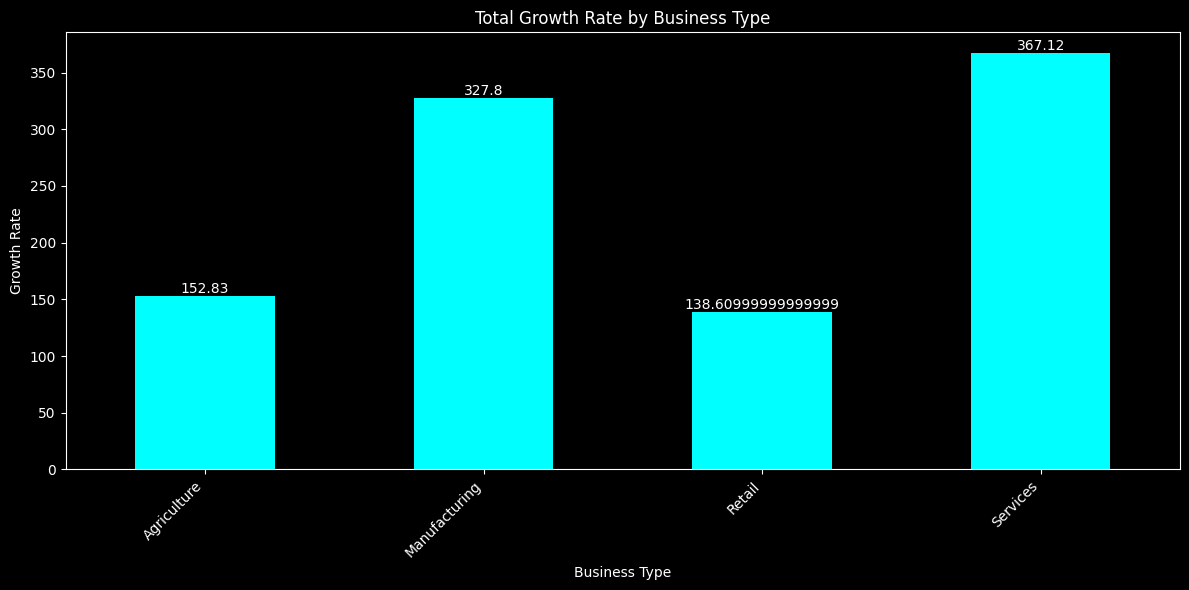

In [43]:
#Plot the growth rate by business type
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
ax = total_growth_rate.plot(kind='bar', legend=False, color='cyan')
plt.title('Total Growth Rate by Business Type')
plt.xlabel('Business Type')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='white', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()